# Simple Linear Regression (Practice)

##### Import libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

##### Import and Split Dataset

In [62]:
url = "./datasets/iris.csv"
data = pd.read_csv(url)
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


Here, we will be using 70% data for training the model and 30% data for testing our hypotheses. We will be using sepal length to determine the species of the the flower.


In [63]:
xTrain = np.array(data.sLength[0:105]).reshape(105,1)
xTest = np.array(data.sLength[105:150]).reshape(45,1)
yTrain = np.array(data.pWidth[0:105]).reshape(105,1)
yTest = np.array(data.pWidth[105:150]).reshape(45,1)

##### Define the linear regression model


In [64]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forwardPropagate(self, xTrain):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, xTrain)+c
        return predictions

    def costFunction(self, predictions, yTrain):
        cost = np.mean((yTrain-predictions)**2)
        return cost

    def backwardPropagate(self, xTrain, yTrain, predictions):
        derivatives = {}
        df = (yTrain-predictions)
        derivatives['dm'] = 2*np.mean(np.multiply(xTrain, df))
        derivatives['dc'] = 2*np.mean(df)
        return derivatives

    def updateParameters(self, derivatives, learningRate):
      self.parameters['m'] = self.parameters['m'] - \
            learningRate*derivatives['dm']
      self.parameters['c'] = self.parameters['c'] - \
            learningRate*derivatives['dc']

    def train(self, xTrain, yTrain, learningRate, iters):
        self.parameters['m'] = np.random.uniform(0, 1)*-1
        self.parameters['c'] = np.random.uniform(0, 1)*-1
        self.loss = []
        fig, ax = plt.subplots()
        xVals = np.linspace(min(xTrain), max(xTrain))
        line, = ax.plot(
            xVals, self.parameters['m']*xVals+self.parameters['c'], color='blue', label='Regression Line')
        ax.scatter(xTrain, yTrain, marker='o',
                   color='red', label='Training Data')
        ax.set_ylim(0, max(yTrain)+1)

        def update(frame):
            predictions = self.forwardPropagation(xTrain)
            cost = self.costFunction(predictions, yTrain)
            derivatives = self.backwardPropagate(xTrain, yTrain, predictions)
            self.updateParameters(derivatives, learningRate)
            line.set_ydata(self.parameters['m']*xVals+self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Lost = {}".format(frame+1, cost))
            return line,
        ani = FuncAnimation(fig, update, frames=iters, interval=41,blit=True)
        ani.save('linearRegression.gif', writer='ffmpeg')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Simple Linear Regression')
        plt.legend()
        plt.show()
        return self.parameters, self.loss

##### Train the Model and Display Output

Iteration = 1, Loss=6049.340453837536
Iteration = 1, Loss=1514.062311929786
Iteration = 1, Loss=383.98645748023756
Iteration = 2, Loss=102.40030174271094
Iteration = 3, Loss=32.2361726733232
Iteration = 4, Loss=14.75302892473775
Iteration = 5, Loss=10.396645233580644
Iteration = 6, Loss=9.3111158875889
Iteration = 7, Loss=9.04060015768174
Iteration = 8, Loss=8.97316507060527
Iteration = 9, Loss=8.95633251191096
Iteration = 10, Loss=8.952108818236734
Iteration = 11, Loss=8.95102693615698
Iteration = 12, Loss=8.950727917030159
Iteration = 13, Loss=8.950623970923525
Iteration = 14, Loss=8.950568635553108
Iteration = 15, Loss=8.95052541624691
Iteration = 16, Loss=8.950485219461546
Iteration = 17, Loss=8.950445779317162
Iteration = 18, Loss=8.950406531213778
Iteration = 19, Loss=8.950367334467034
Iteration = 20, Loss=8.950328154021562


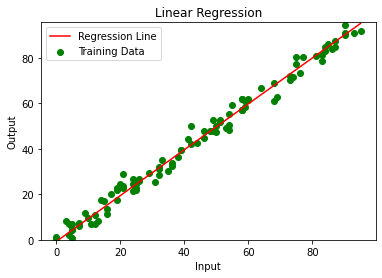

In [65]:
linearReg = LinearRegression()
parameters, loss = linearReg.train(xTrain, yTrain, 0.0001, 20)